<a href="https://colab.research.google.com/github/likeaAI/ai_study/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model ,load_model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D 
from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy  as np
import pandas as pd




In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-04-28 15:51:45.318466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 15:51:45.318559: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13037103179856917166
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 16979740301230489958
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

Metal device set to: Apple M1


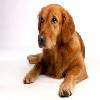

In [5]:
img = image.load_img('/Users/book/downloads/test_dog.png' , target_size = (100,100))
img

# 이미지를 학습하기 위해서는 넘파이 배열로 변환해야 한다. 

In [6]:
print('rows - width , cols - height , channels - rgb')
img = image.img_to_array(img)
img = np.expand_dims(img , axis = 0) 
image_ = np.vstack([img]) 
image_.shape
# rgb code가 있어서 채널이 3개다.

rows - width , cols - height , channels - rgb


(1, 100, 100, 3)

In [7]:
print('CNN - Convolution Neural Network 합성곱 신경망 - ')
print('CNN 핵심 - 합성곱레이어와 풀링레이어')
print('padding  - valid , same')
print('filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이')
print('kernel_size - 연산을 수행할 때 원도우의 크기')
print('strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정')
model = Sequential() 

model.add( Conv2D(input_shape = (10, 10, 3) , 
                  filters = 10 , 
                  kernel_size = (3,3) , 
                  strides = (1,1) , 
                  padding = 'same') )

CNN - Convolution Neural Network 합성곱 신경망 - 
CNN 핵심 - 합성곱레이어와 풀링레이어
padding  - valid , same
filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이
kernel_size - 연산을 수행할 때 원도우의 크기
strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정


2022-04-28 15:59:25.855100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 15:59:25.855149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- CNN - Convolution Neural Network 합성공 신경망 - 
- CNN 핵심 - 합성곱레이어와 플링레이어 
- padding - valid, smae 
- kernel_size - 연산을 수행할때 윈도우 크기 
- strides - 가로 세로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정 

In [8]:
model.output_shape

(None, 10, 10, 10)

In [9]:
print('풀링 - pooling ')
print('원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - ')
print()

# model.add( MaxPooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
# print(model.output_shape)

model.add( AveragePooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
print(model.output_shape)


풀링 - pooling 
원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - 

(None, 9, 9, 10)


In [10]:
datasets = load_digits()
datasets.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
datasets.images[0].shape # 왜 채널이 없을까 흑백이라서 1차원으로 본다. 컬러풀은 3차원...  

(8, 8)

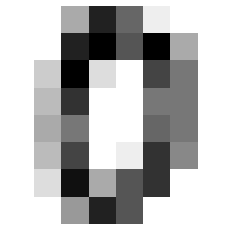

In [12]:
plt.figure()

plt.imshow(datasets.images[0] , cmap = plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

In [13]:
datasets.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
X_data = datasets.images
y_data = datasets.target 

In [15]:
X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [16]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1] ,  X_data.shape[2], 1 )
X_data.shape # 채널 1이 있어야 학습이 가능해서 위의 모양대로 reshape을 하였다. 

(1797, 8, 8, 1)

In [17]:
y_data = to_categorical(y_data)
y_data.shape

(1797, 10)

In [18]:
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_data , 
                                                       test_size    = 0.2 ,
                                                       random_state = 111)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [21]:
print('cnn 입력층 - ')
mnist_cnn_model = Sequential()
mnist_cnn_model.add( Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]) , 
                            filters = 10 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'valid' , activation = 'relu') ) 

print('shape - ' , mnist_cnn_model.output_shape)

cnn 입력층 - 
shape -  (None, 6, 6, 10)


In [22]:
print('cnn 풀링레이어 만들기 - ')

mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
print(mnist_cnn_model.output_shape)


cnn 풀링레이어 만들기 - 
(None, 3, 3, 10)


In [23]:
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.output_shape

(None, 90)

In [24]:
mnist_cnn_model.add( Dense(50 , activation = 'relu'))
mnist_cnn_model.add( Dense(10 , activation = 'softmax'))

In [25]:
mnist_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 10)          100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 50)                4550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
____________________________________________________

In [26]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [27]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=100  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/100


2022-04-28 15:59:30.556898: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-28 15:59:30.775393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 3s 15ms/step - loss: 1.9835 - accuracy: 0.4656 - val_loss: 0.7026 - val_accuracy: 0.8056
Epoch 2/100
15/23 [==================>...........] - ETA: 0s - loss: 0.4405 - accuracy: 0.8813

2022-04-28 15:59:33.316011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 10ms/step - loss: 0.3839 - accuracy: 0.8921 - val_loss: 0.2213 - val_accuracy: 0.9201
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1591 - accuracy: 0.9487 - val_loss: 0.1502 - val_accuracy: 0.9479
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.1031 - accuracy: 0.9713 - val_loss: 0.1630 - val_accuracy: 0.9375
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0758 - accuracy: 0.9739 - val_loss: 0.0868 - val_accuracy: 0.9618
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0441 - accuracy: 0.9887 - val_loss: 0.1281 - val_accuracy: 0.9583
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.1005 - val_accuracy: 0.9653
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0739 - val_accuracy: 0.9722
Epoch 9/100
23/23 [

23/23 [==============================] - 0s 9ms/step - loss: 1.4602e-04 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9826
Epoch 59/100
23/23 [==============================] - 0s 9ms/step - loss: 1.3642e-04 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9826
Epoch 60/100
23/23 [==============================] - 0s 9ms/step - loss: 1.3392e-04 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9826
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 1.3007e-04 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9826
Epoch 62/100
23/23 [==============================] - 0s 10ms/step - loss: 1.2577e-04 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9826
Epoch 63/100
23/23 [==============================] - 0s 9ms/step - loss: 1.2165e-04 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9826
Epoch 64/100
23/23 [==============================] - 0s 10ms/step - loss: 1.2018e-04 - accuracy: 1.0000 - val_loss: 0.0718 - val_accura

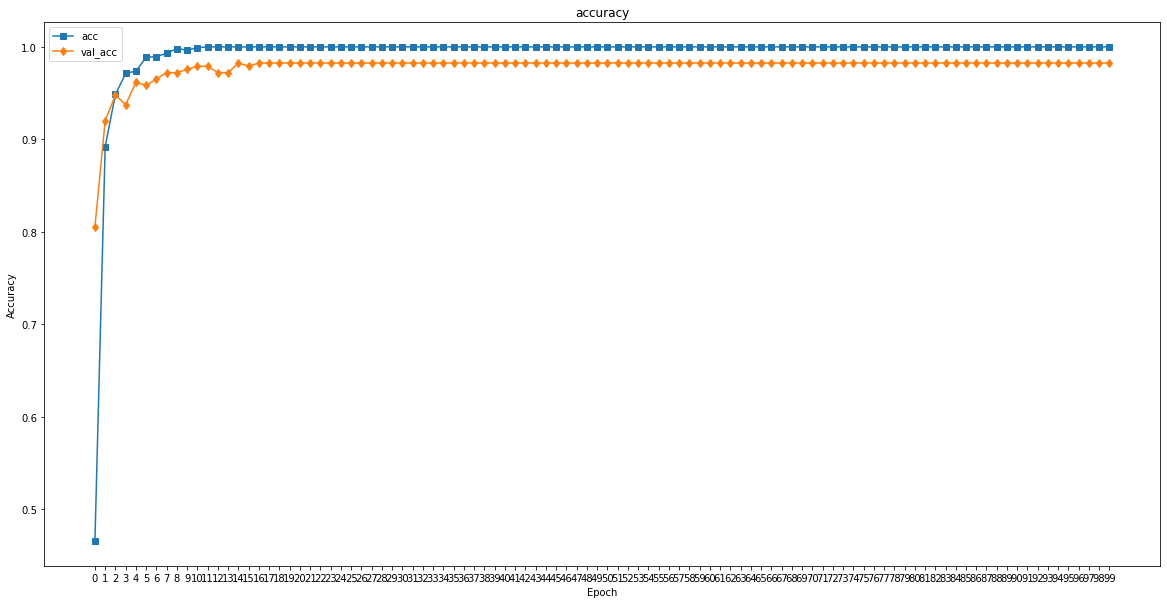

In [28]:
plt.figure(figsize=(20,10))

plt.plot(mnist_cnn_model_history.history['accuracy']    , 's-', label='acc')
plt.plot(mnist_cnn_model_history.history['val_accuracy'], 'd-', label='val_acc')

plt.legend(loc='best')
plt.xticks(np.arange(100))
plt.title('accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [29]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test , y_test)
mnist_cnn_model_eval

12/12 [==============================] - 0s 14ms/step - loss: 0.1231 - accuracy: 0.9750


[0.12310900539159775, 0.9750000238418579]

mnist 이용한 CNN

In [30]:
(X_train,y_train),(X_test, y_test)= mnist.load_data()

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

In [31]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2], 1 )
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , X_test.shape[2], 1 )

In [32]:
(X_train.shape, y_train.shape) , (X_test.shape, y_test.shape)

(((60000, 28, 28, 1), (60000,)), ((10000, 28, 28, 1), (10000,)))

In [33]:
# 데이터 전처리 - 

X_train, X_test = X_train/255 , X_test/255

In [34]:

mnist_cnn_model = Sequential()
#1 
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 32 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 64 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#3 
mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]), 
                           filters = 64 , 
                           kernel_size= (3,3),
                           strides = (1,1),
                           padding = 'same' , activation= 'relu'))

mnist_cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))




In [35]:
# CNN 입력층 생성 
mnist_cnn_model.output_shape

(None, 4, 4, 64)

feature extraction - 

In [36]:
print('Dense 층 추가 - ')
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.add( Dense(units = 512) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 256) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 128) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 64) )
mnist_cnn_model.add( Activation('relu') )

mnist_cnn_model.add( Dense(units = 10) )
mnist_cnn_model.add( Activation('softmax') )


# mnist_cnn_model.output_shape

Dense 층 추가 - 


In [37]:
mnist_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

In [38]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [39]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=12  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/12


2022-04-28 15:59:56.484329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


960/960 [==============================] - ETA: 0s - loss: 0.4912 - accuracy: 0.8371

2022-04-28 16:00:08.165435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


960/960 [==============================] - 13s 12ms/step - loss: 0.4912 - accuracy: 0.8371 - val_loss: 0.1925 - val_accuracy: 0.9471
Epoch 2/12
960/960 [==============================] - 11s 12ms/step - loss: 0.2136 - accuracy: 0.9433 - val_loss: 0.1973 - val_accuracy: 0.9495
Epoch 3/12
960/960 [==============================] - 12s 12ms/step - loss: 0.2109 - accuracy: 0.9460 - val_loss: 0.2037 - val_accuracy: 0.9449
Epoch 4/12
960/960 [==============================] - 12s 12ms/step - loss: 0.1889 - accuracy: 0.9524 - val_loss: 0.1661 - val_accuracy: 0.9577
Epoch 5/12
960/960 [==============================] - 12s 12ms/step - loss: 0.1755 - accuracy: 0.9553 - val_loss: 0.2090 - val_accuracy: 0.9489
Epoch 6/12
960/960 [==============================] - 12s 12ms/step - loss: 0.1892 - accuracy: 0.9525 - val_loss: 0.1903 - val_accuracy: 0.9499
Epoch 7/12
960/960 [==============================] - 11s 12ms/step - loss: 0.2049 - accuracy: 0.9507 - val_loss: 0.1630 - val_accuracy: 0.9597
Epo

In [40]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test, y_test)
mnist_cnn_model_eval

2022-04-28 16:02:15.594455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.2142 - accuracy: 0.9443


[0.21424172818660736, 0.9443000555038452]

In [41]:
print('모델 저장')
mnist_cnn_model.save('model-case.h12')

모델 저장


2022-04-28 16:02:18.173885: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model-case.h12/assets


In [44]:
print('모델 복원')
loaded_model = load_model('model-case.h12')
loaded_model.summary()

모델 복원
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)  

In [45]:
loss , acc = loaded_model.evaluate(X_test , y_test)
print('loss - ' , loss)
print('acc  - ' , acc)

 19/313 [>.............................] - ETA: 1s - loss: 0.1793 - accuracy: 0.9507

2022-04-28 16:30:39.564160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.2142 - accuracy: 0.9443
loss -  0.21424172818660736
acc  -  0.9443000555038452


이미지 분류 (horse-or-human)

In [46]:
import os 
print('데이터 세트 경로 - ')
train_horse_dir = '/Users/book/Downloads/horse-or-human/horses'
train_human_dir = '/Users/book/Downloads/horse-or-human/humans'

데이터 세트 경로 - 


In [47]:
train_horse_fileName = os.listdir(train_horse_dir)
train_human_fileName = os.listdir(train_human_dir)

In [48]:
train_horse_fileName[0:10]

['horse43-5.png',
 'horse06-5.png',
 'horse20-6.png',
 'horse04-7.png',
 'horse41-7.png',
 'horse22-4.png',
 'horse19-2.png',
 'horse24-2.png',
 'horse37-8.png',
 'horse02-1.png']

In [49]:
train_human_fileName[0:10]

['human17-22.png',
 'human10-17.png',
 'human10-03.png',
 'human07-27.png',
 'human09-22.png',
 'human05-22.png',
 'human02-03.png',
 'human02-17.png',
 'human15-27.png',
 'human12-12.png']

In [50]:
print('총 이미지 갯수 - ')
print('horse len - ' , len(train_horse_fileName))
print('human len - ' , len(train_human_fileName))

# 'C:/Users/crid2/ml-data/horse-or-human' 

총 이미지 갯수 - 
horse len -  500
human len -  527


In [51]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    '/Users/book/Downloads/horse-or-human' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [52]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (300, 300, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 1) )
  img_model.add( Activation('sigmoid') )

  return img_model 

In [53]:
model = img_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 activation_5 (Activation)   (None, 298, 298, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 149, 149, 16)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 activation_6 (Activation)   (None, 147, 147, 32)      0         
                                                      

In [54]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'binary_crossentropy' , 
                      metrics=['accuracy'] ) 

/Users/book/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [55]:
model_history = model.fit(train_generator , epochs = 15 , verbose = 1 , steps_per_epoch = 8 )

Epoch 1/15


2022-04-28 16:30:52.495860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 10s 947ms/step - loss: 1.9649 - accuracy: 0.4872
Epoch 2/15
8/8 [==============================] - 7s 833ms/step - loss: 0.7046 - accuracy: 0.5484
Epoch 3/15
8/8 [==============================] - 7s 825ms/step - loss: 0.7985 - accuracy: 0.6240
Epoch 4/15
8/8 [==============================] - 7s 827ms/step - loss: 0.6274 - accuracy: 0.6385
Epoch 5/15
8/8 [==============================] - 7s 825ms/step - loss: 0.5312 - accuracy: 0.7475
Epoch 6/15
8/8 [==============================] - 7s 826ms/step - loss: 0.5140 - accuracy: 0.7653
Epoch 7/15
8/8 [==============================] - 7s 827ms/step - loss: 0.6030 - accuracy: 0.7976
Epoch 8/15
8/8 [==============================] - 7s 832ms/step - loss: 0.3508 - accuracy: 0.8498
Epoch 9/15
8/8 [==============================] - 7s 843ms/step - loss: 0.3824 - accuracy: 0.8776
Epoch 10/15
8/8 [==============================] - 7s 821ms/step - loss: 0.2048 - accuracy: 0.9266
Epoch 11/15
8/8 [============

In [56]:
from google.colab import files

upload_img = files.upload()
print(upload_img)
print(upload_img.keys())

for fn in upload_img.keys() :
  print('file name - ' , fn )
  path = '/content/'+fn
  img = image.load_img(path , target_size = (300, 300))
  x   = image.img_to_array(img) 
  x   = np.expand_dims(x , axis = 0 ) 
  image_ = np.vstack([x])

  classes = model.predict(image_ , batch_size = 10 ) 
  print('pred - ' , classes[0])
print('예측하기 - ')


/Users/book/miniforge3/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


KeyboardInterrupt: 

In [57]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /downloads/cats_and_dogs_filtered.zip


zsh:1: command not found: wget


고양이 개 이미지 분류 실습하기 

In [58]:
import os
import zipfile

path = '/Users/book/Downloads/cats_and_dogs_filtered.zip' 
zip  = zipfile.ZipFile(path , 'r')

zip.extractall('/Users/book/Downloads/')
zip.close()

In [59]:
cat_image = '/Users/book/Downloads/cats_and_dogs_filtered/train/cats/'
dog_image = '/Users/book/Downloads/cats_and_dogs_filtered/train/dogs/'

In [60]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    '/Users/book/Downloads/cats_and_dogs_filtered/train/' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [61]:
base_dir = '/Users/book/Downloads/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/Users/book/Downloads/cats_and_dogs_filtered/train/cats
/Users/book/Downloads/cats_and_dogs_filtered/train/dogs
/Users/book/Downloads/cats_and_dogs_filtered/validation/cats
/Users/book/Downloads/cats_and_dogs_filtered/validation/dogs


In [62]:
print('Kaggle Dogs Vs. Cats 데이터셋 살펴보기')
print()

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

Kaggle Dogs Vs. Cats 데이터셋 살펴보기

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg']


In [63]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


In [64]:
print('모델 구성하기 - ')
import tensorflow as tf


cat_and_dog_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

cat_and_dog_model.summary()

모델 구성하기 - 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17

In [65]:
print('모델 컴파일하기 - ')

from tensorflow.keras.optimizers import RMSprop

cat_and_dog_model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

모델 컴파일하기 - 


In [66]:
print('이미지 데이터 전처리하기')
print('훈련을 진행하기 전, tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 이용해서 데이터 전처리를 진행합니다.')

print('https://keras.io/api/preprocessing/image/')

'''
이미지 어그맨테이션
ImageDataGenerator 클래스의 rescale 파라미터의 값을 1.0/255로 지정하면 모든 값을 255로 나누게 됩니다.
rotation_range는 이미지를 임의로 회전시키는 각도를 지정합니다. 0~180 사이의 값을 입력합니다.
width_shift, height_shift는 이미지를 임의로 수직 또는 수평 방향으로 이동시키는 범위를 지정합니다. 이미지의 너비 또는 높이에 대한 비율로 지정합니다.
shear_range는 전단변환 (shearing transformation)을 위한 파라미터입니다. 이미지를 어긋나 보이도록 변환합니다.
zoom_range는 이미지를 임의로 확대하는 정도를 지정합니다.
horizontal_flip은 이미지를 임의로 (수평 방향으로) 뒤집을지 여부를 결정합니다.
fill_mode는 회전 또는 이동 변환 후 빈 픽셀을 채우는 방식을 지정합니다. 디폴트는 ‘nearest’이며, {‘constant’, ‘nearest’, ‘reflect’, ‘wrap’} 중 하나의 값으로 지정합니다.
'''

train_datagen = ImageDataGenerator( rescale = 1.0/255. , 
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

이미지 데이터 전처리하기
훈련을 진행하기 전, tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 이용해서 데이터 전처리를 진행합니다.
https://keras.io/api/preprocessing/image/
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [69]:
print('모델 훈련하기')
print('fit() 메서드는 앞에서 구성한 Neural Network 모델을 훈련합니다.')

history = cat_and_dog_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_steps=50,
                    verbose=2)

모델 훈련하기
fit() 메서드는 앞에서 구성한 Neural Network 모델을 훈련합니다.
Epoch 1/50
100/100 - 8s - loss: 0.5181 - accuracy: 0.7540 - val_loss: 0.5432 - val_accuracy: 0.7460 - 8s/epoch - 81ms/step
Epoch 2/50
100/100 - 8s - loss: 0.5267 - accuracy: 0.7455 - val_loss: 0.5022 - val_accuracy: 0.7600 - 8s/epoch - 82ms/step
Epoch 3/50
100/100 - 8s - loss: 0.5290 - accuracy: 0.7375 - val_loss: 0.5710 - val_accuracy: 0.7420 - 8s/epoch - 82ms/step
Epoch 4/50
100/100 - 8s - loss: 0.5310 - accuracy: 0.7370 - val_loss: 0.4936 - val_accuracy: 0.7530 - 8s/epoch - 81ms/step
Epoch 5/50
100/100 - 8s - loss: 0.5207 - accuracy: 0.7525 - val_loss: 0.5425 - val_accuracy: 0.7400 - 8s/epoch - 81ms/step
Epoch 6/50
100/100 - 8s - loss: 0.5176 - accuracy: 0.7455 - val_loss: 0.5392 - val_accuracy: 0.7370 - 8s/epoch - 81ms/step
Epoch 7/50
100/100 - 8s - loss: 0.5268 - accuracy: 0.7345 - val_loss: 0.5089 - val_accuracy: 0.7490 - 8s/epoch - 81ms/step
Epoch 8/50
100/100 - 8s - loss: 0.5104 - accuracy: 0.7505 - val_loss: 0.4986 - val_acc

In [70]:
print('모델 저장')
cat_and_dog_model.save('cat_and_dog_model-case.h12')

모델 저장
INFO:tensorflow:Assets written to: cat_and_dog_model-case.h12/assets


정확도와 손실 확인하기


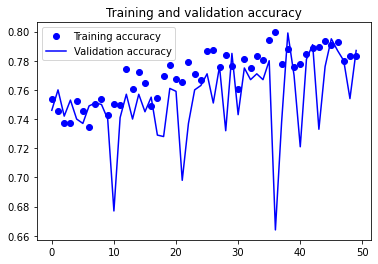

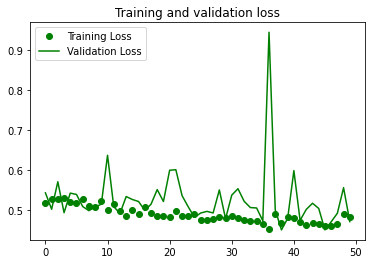

In [71]:
print('정확도와 손실 확인하기')

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()